In [31]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("HR_Analytics.csv")
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [52]:
print(df.isnull().sum())

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [53]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].mean())

In [54]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [55]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [56]:
categorical_columns = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "Attrition",
]
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])


encoded_df = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out(categorical_columns)
)

df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)



C:\Users\Hema Priya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
numerical_columns = [
    "Age",
    "DailyRate",
    "Education",
    "DistanceFromHome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
]

In [60]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [61]:
# outlier detection
z_scores = np.abs(stats.zscore(df[numerical_columns]))
df = df[(z_scores < 3).all(axis=1)]  

In [62]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(df[numerical_columns])

In [63]:
df["PCA_1"] = pca_features[:, 0]
df["PCA_2"] = pca_features[:, 1]

In [65]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Explained Variance: {explained_variance.sum() * 100:.2f}%")

Explained Variance by each PCA component: [0.32153383 0.16563598]
Total Explained Variance: 48.72%


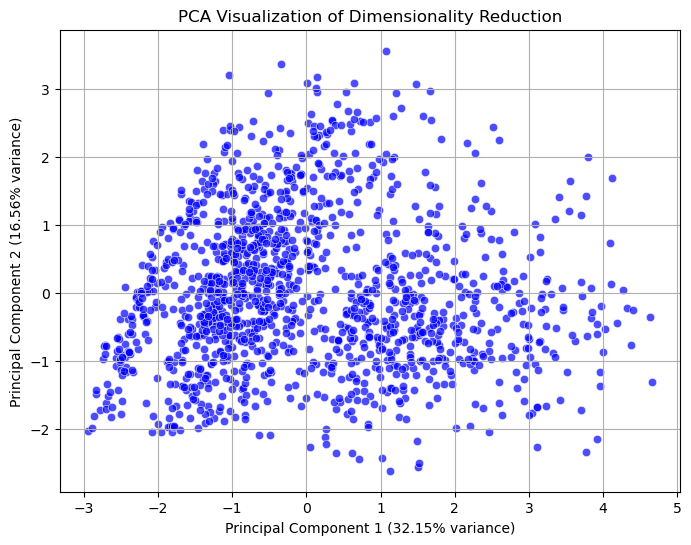

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA_1", y="PCA_2", data=df, alpha=0.7, color="b")
plt.title("PCA Visualization of Dimensionality Reduction")
plt.xlabel(f"Principal Component 1 ({explained_variance[0] * 100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1] * 100:.2f}% variance)")
plt.grid(True)
plt.show()

In [70]:
#output components after dimensionality reduction
pca_output = df[["PCA_1", "PCA_2"]]
print(pca_output.head())

      PCA_1     PCA_2
0 -2.739667 -0.975860
1 -2.720893 -0.892910
2 -2.714994 -0.758197
3 -2.841267 -1.490269
4 -2.944008 -2.031238
